# Del 5: Procesiranje velikih datasetov v pandas-u

Pripravimo datasete:

In [1]:
!tar -xJf data/data_del_05.tar.xz -C ./data/

Viri:
- [Tutorial: Using Pandas with Large Data Sets in Python](https://www.dataquest.io/blog/pandas-big-data/)
- [How to handle large datasets in Python with Pandas and Dask](https://towardsdatascience.com/how-to-handle-large-datasets-in-python-with-pandas-and-dask-34f43a897d55)
- [Why is Python so slow?](https://hackernoon.com/why-is-python-so-slow-e5074b6fe55b)
- [Why Python is Slow: Looking Under the Hood](https://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/)
- [Make working with large DataFrames easier, at least for your memory](https://towardsdatascience.com/make-working-with-large-dataframes-easier-at-least-for-your-memory-6f52b5f4b5c4)
- [“Large data” work flows using pandas](https://stackoverflow.com/questions/14262433/large-data-work-flows-using-pandas)
- [Why and How to Use Pandas with Large Data](https://towardsdatascience.com/why-and-how-to-use-pandas-with-large-data-9594dda2ea4c)
- [4 Strategies to Deal With Large Datasets Using Pandas](https://www.codementor.io/guidotournois/4-strategies-to-deal-with-large-datasets-using-pandas-qdw3an95k)

## Introduction & Data

We'll be working with data on the Museum of Modern Art's exhibitions. More specifically, we'll use the file `MoMAExhibitions1929to1989.csv`, which you can download from [data.world](https://data.world/moma/exhibitions).

In [2]:
import pandas as pd
import numpy as np

In [3]:
moma = pd.read_csv('data/MoMAExhibitions1929to1989.csv')

In [4]:
moma.head(2)

,ExhibitionID,ExhibitionNumber,ExhibitionTitle,ExhibitionCitationDate,ExhibitionBeginDate,ExhibitionEndDate,ExhibitionSortOrder,ExhibitionURL,ExhibitionRole,ConstituentID,...,Institution,Nationality,ConstituentBeginDate,ConstituentEndDate,ArtistBio,Gender,VIAFID,WikidataID,ULANID,ConstituentURL
0,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,http://www.moma.org/calendar/exhibitions/1767,Director,9168.0,...,NaN,American,1902.0,1981.0,"American, 1902–1981",Male,109252853.0,Q711362,500241556.0,moma.org/artists/9168
1,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,http://www.moma.org/calendar/exhibitions/1767,Artist,1053.0,...,NaN,French,1839.0,1906.0,"French, 1839–1906",Male,39374836.0,Q35548,500004793.0,moma.org/artists/1053


In [5]:
moma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34558 entries, 0 to 34557
Data columns (total 27 columns):
ExhibitionID              34129 non-null float64
ExhibitionNumber          34558 non-null object
ExhibitionTitle           34558 non-null object
ExhibitionCitationDate    34557 non-null object
ExhibitionBeginDate       34558 non-null object
ExhibitionEndDate         33354 non-null object
ExhibitionSortOrder       34558 non-null float64
ExhibitionURL             34125 non-null object
ExhibitionRole            34424 non-null object
ConstituentID             34044 non-null float64
ConstituentType           34424 non-null object
DisplayName               34424 non-null object
AlphaSort                 34424 non-null object
FirstName                 31499 non-null object
MiddleName                3804 non-null object
LastName                  31998 non-null object
Suffix                    157 non-null object
Institution               2458 non-null object
Nationality               26

In [6]:
# velikost piše 7.1+, ker je to samo približek, ki ga Pandas oceni. To je lahko tudi 10, 20, 100 MB ali GB

## Optimizing Dataframe Memory Footprint

### The Internal Representation of a Dataframe

<img src="./images/pandas_dataframe_blocks.png">

In [ ]:
# v spominu Pandas da vse podatke tipa object v en kos, vse floate pa v drugi kos itd. 
# kot vidimo, pa tam ni imen stolpcev. Optimizirani so le za shranjevanje svojih tipov podatkov.
# Pandas pa ima Block Manager, ki iz blockov prebere podatke in sestavi dataset

In [9]:
# kako je to shranjeno:
moma._data

BlockManager
Items: Index(['ExhibitionID', 'ExhibitionNumber', 'ExhibitionTitle',
       'ExhibitionCitationDate', 'ExhibitionBeginDate', 'ExhibitionEndDate',
       'ExhibitionSortOrder', 'ExhibitionURL', 'ExhibitionRole',
       'ConstituentID', 'ConstituentType', 'DisplayName', 'AlphaSort',
       'FirstName', 'MiddleName', 'LastName', 'Suffix', 'Institution',
       'Nationality', 'ConstituentBeginDate', 'ConstituentEndDate',
       'ArtistBio', 'Gender', 'VIAFID', 'WikidataID', 'ULANID',
       'ConstituentURL'],
      dtype='object')
Axis 1: RangeIndex(start=0, stop=34558, step=1)
FloatBlock: [0, 6, 9, 19, 20, 23, 25], 7 x 34558, dtype: float64
ObjectBlock: [1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 24, 26], 20 x 34558, dtype: object

### Dataframe Memory Footprint

#### Float Columns

In [11]:
# da izračunamo, koliko porabimo pomnilnika en stolpec float64 v našem datasetu (64 bitov = 8 bytov)
34557 *8


276456

In [12]:
moma['ExhibitionID'].nbytes

276464

In [13]:
276456/1024/1024


0.26364898681640625

#### Object Columns

<img src="./images/numpy_vs_python.png">

#### True Memory Footprint

In [ ]:
# stringe šteje samo kot pointere na stringe, ki zasedajo 8B. Zato izpiše velikost 7,1MB. To je shallow memory.


In [14]:
total_bytes = moma.size * 8

In [17]:
total_megabytes = total_bytes/1024/1024

In [18]:
print('Total bytes:', total_bytes)
print('Total megabytes:', total_megabytes)

Total bytes: 7464528
Total megabytes: 7.1187286376953125


In [21]:
# tako pa pogledamo koliko je dejansko porabljeno pomnilnika
moma.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34558 entries, 0 to 34557
Data columns (total 27 columns):
ExhibitionID              34129 non-null float64
ExhibitionNumber          34558 non-null object
ExhibitionTitle           34558 non-null object
ExhibitionCitationDate    34557 non-null object
ExhibitionBeginDate       34558 non-null object
ExhibitionEndDate         33354 non-null object
ExhibitionSortOrder       34558 non-null float64
ExhibitionURL             34125 non-null object
ExhibitionRole            34424 non-null object
ConstituentID             34044 non-null float64
ConstituentType           34424 non-null object
DisplayName               34424 non-null object
AlphaSort                 34424 non-null object
FirstName                 31499 non-null object
MiddleName                3804 non-null object
LastName                  31998 non-null object
Suffix                    157 non-null object
Institution               2458 non-null object
Nationality               26

In [22]:
# koliko porabi vsak posamezni stolpec?

In [27]:
moma.memory_usage(deep = True)

Index                          80
ExhibitionID               276464
ExhibitionNumber          2085850
ExhibitionTitle           3333695
ExhibitionCitationDate    3577728
ExhibitionBeginDate       2281851
ExhibitionEndDate         2234872
ExhibitionSortOrder        276464
ExhibitionURL             3494606
ExhibitionRole            2179383
ConstituentID              276464
ConstituentType           2313112
DisplayName               2548428
AlphaSort                 2534329
FirstName                 2104929
MiddleName                1218953
LastName                  2162941
Suffix                    1110349
Institution               1221368
Nationality               1949664
ConstituentBeginDate       276464
ConstituentEndDate         276464
ArtistBio                 3183300
Gender                    1858994
VIAFID                     276464
WikidataID                1821293
ULANID                     276464
ConstituentURL            2677922
dtype: int64

> **index** : *bool, default True* --> 
Specifies whether to include the memory usage of the DataFrame’s index in returned Series. If index=True, the memory usage of the index is the first item in the output.

In [28]:
moma.memory_usage(deep=True, index=False)

ExhibitionID               276464
ExhibitionNumber          2085850
ExhibitionTitle           3333695
ExhibitionCitationDate    3577728
ExhibitionBeginDate       2281851
ExhibitionEndDate         2234872
ExhibitionSortOrder        276464
ExhibitionURL             3494606
ExhibitionRole            2179383
ConstituentID              276464
ConstituentType           2313112
DisplayName               2548428
AlphaSort                 2534329
FirstName                 2104929
MiddleName                1218953
LastName                  2162941
Suffix                    1110349
Institution               1221368
Nationality               1949664
ConstituentBeginDate       276464
ConstituentEndDate         276464
ArtistBio                 3183300
Gender                    1858994
VIAFID                     276464
WikidataID                1821293
ULANID                     276464
ConstituentURL            2677922
dtype: int64

In [29]:
# funkcija, ki pogleda koliko je podatkovnih tipov v datasetu in za vsak tip izpiše porabo spomina
def get_memory_usage_by_type(df, types=[]):
    if not types:
        types = []
        for column in df.columns:
            if hasattr(df[column], 'cat'):
                types.append('category')
            else:
                types.append(df[column].dtype)
        types = list(set(types))
    total = 0
    for dtype in types:
        selected_dtype = df.select_dtypes(include=[dtype])
        num_of_columns = len(selected_dtype.columns)
        mean_usage_b = selected_dtype.memory_usage(deep=True, index=False).mean()
        mean_usage_mb = mean_usage_b / 1024 ** 2
        sum_usage_b = selected_dtype.memory_usage(deep=True, index=False).sum()
        sum_usage_mb = sum_usage_b / 1024 ** 2
        print(f"Average memory usage: {round(mean_usage_mb, 3)} MB and total: {round(sum_usage_mb, 3)} MB for {num_of_columns}x {dtype} columns.")
        total += sum_usage_mb
        
    print('----------------------')
    print(f'Total memory usage: {round(total, 3)} MB')

In [30]:
get_memory_usage_by_type(moma)

Average memory usage: 2.188 MB and total: 43.768 MB for 20x object columns.
Average memory usage: 0.264 MB and total: 1.846 MB for 7x float64 columns.
----------------------
Total memory usage: 45.613 MB


### Optimizing Numeric Columns with Subtypes

<table>
<thead>
<tr>
<th>memory usage</th>
<th>float</th>
<th>int</th>
<th>uint</th>
<th>datetime</th>
<th>bool</th>
<th>object</th>
</tr>
</thead>
<tbody>
<tr>
<td>1 bytes</td>
<td></td>
<td>int8</td>
<td>uint8</td>
<td></td>
<td>bool</td>
<td></td>
</tr>
<tr>
<td>2 bytes</td>
<td>float16</td>
<td>int16</td>
<td>uint16</td>
<td></td>
<td></td>
<td></td>
</tr>
<tr>
<td>4 bytes</td>
<td>float32</td>
<td>int32</td>
<td>uint32</td>
<td></td>
<td></td>
<td></td>
</tr>
<tr>
<td>8 bytes</td>
<td>float64</td>
<td>int64</td>
<td>uint64</td>
<td>datetime64</td>
<td></td>
<td></td>
</tr>
<tr>
<td>variable</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td>object</td>
</tr>
</tbody>
</table>

In [32]:
# glavni tipi imajo veliko podtipov
int_types = ["int8", "int16", "int32", "int64"]

for it in int_types:
    print(np.iinfo(it))


Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------



#### Integer Columns

In [33]:
# moramo pogledati največje in najmanjše vrednosti po stolpcih, da lahko ocenimo pravi podatkovni tip

In [34]:
moma.head()

,ExhibitionID,ExhibitionNumber,ExhibitionTitle,ExhibitionCitationDate,ExhibitionBeginDate,ExhibitionEndDate,ExhibitionSortOrder,ExhibitionURL,ExhibitionRole,ConstituentID,...,Institution,Nationality,ConstituentBeginDate,ConstituentEndDate,ArtistBio,Gender,VIAFID,WikidataID,ULANID,ConstituentURL
0,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,http://www.moma.org/calendar/exhibitions/1767,Director,9168.0,...,NaN,American,1902.0,1981.0,"American, 1902–1981",Male,109252853.0,Q711362,500241556.0,moma.org/artists/9168
1,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,http://www.moma.org/calendar/exhibitions/1767,Artist,1053.0,...,NaN,French,1839.0,1906.0,"French, 1839–1906",Male,39374836.0,Q35548,500004793.0,moma.org/artists/1053
2,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,http://www.moma.org/calendar/exhibitions/1767,Artist,2098.0,...,NaN,French,1848.0,1903.0,"French, 1848–1903",Male,27064953.0,Q37693,500011421.0,moma.org/artists/2098
3,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,http://www.moma.org/calendar/exhibitions/1767,Artist,2206.0,...,NaN,Dutch,1853.0,1890.0,"Dutch, 1853–1890",Male,9854560.0,Q5582,500115588.0,moma.org/artists/2206
4,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,http://www.moma.org/calendar/exhibitions/1767,Artist,5358.0,...,NaN,French,1859.0,1891.0,"French, 1859–1891",Male,24608076.0,Q34013,500008873.0,moma.org/artists/5358


In [37]:
# tako ne gre, ker imamo NaN-e
moma['ConstituentID'].astype('int')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [40]:
# filtriranje samo stolpcev float
moma.select_dtypes(include = ['float']).isnull().sum()

ExhibitionID              429
ExhibitionSortOrder         0
ConstituentID             514
ConstituentBeginDate     9268
ConstituentEndDate      14739
VIAFID                   7562
ULANID                  12870
dtype: int64

In [41]:
# lahko pretvorimo drugi stolpec, ker nima manjkajočih vrednosti

In [ ]:
moma = pd.read_csv("data/MoMAExhibitions1929to1989.csv")
moma.select_dtypes(include=['float']).head()

In [42]:
get_memory_usage_by_type(moma)

Average memory usage: 2.188 MB and total: 43.768 MB for 20x object columns.
Average memory usage: 0.264 MB and total: 1.846 MB for 7x float64 columns.
----------------------
Total memory usage: 45.613 MB


In [43]:
# Function to convert to best integer subtype
def convert_col_to_best_int_subtype(df, columns=[]):
    for column in columns:
        col_max = df[column].max()
        col_min = df[column].min()
        
        if col_max < np.iinfo('int8').max and col_min > np.iinfo('int8').min:
            df[column] = df[column].astype('int8')
        elif col_max <  np.iinfo("int16").max and col_min > np.iinfo("int16").min:
            df[column] = df[column].astype("int16")
        elif col_max <  np.iinfo("int32").max and col_min > np.iinfo("int32").min:
            df[column] = df[column].astype("int32")
        elif col_max <  np.iinfo("int64").max and col_min > np.iinfo("int64").min:
            df[column] = df[column].astype("int64")

In [44]:
convert_col_to_best_int_subtype(moma, ['ExhibitionSortOrder'])

In [45]:
moma.dtypes.value_counts()

object     20
float64     6
int16       1
dtype: int64

In [46]:
get_memory_usage_by_type(moma)

Average memory usage: 2.188 MB and total: 43.768 MB for 20x object columns.
Average memory usage: 0.264 MB and total: 1.582 MB for 6x float64 columns.
Average memory usage: 0.066 MB and total: 0.066 MB for 1x int16 columns.
----------------------
Total memory usage: 45.415 MB


#### Float Columns

In [47]:
value_by = len(moma) * 2 + 80

In [49]:
value_by == moma['ExhibitionSortOrder'].memory_usage(deep = True)

True

In [50]:
# ta način pretvarjanja je precej tečen. Je tudi boljši način, kot bomo viideli

In [52]:
# Reset the dataframe to the original CSV
moma = pd.read_csv("data/MoMAExhibitions1929to1989.csv")

# ga ne skalira navzdol, ampak pusti kar na 64 bit
moma['ExhibitionSortOrder'] = moma['ExhibitionSortOrder'].astype('int')
moma['ExhibitionSortOrder'].dtype

dtype('int64')

In [54]:
# Reset the dataframe to the original CSV
moma = pd.read_csv("data/MoMAExhibitions1929to1989.csv")


# navzdol skaliramo takole:
moma['ExhibitionSortOrder'] = moma['ExhibitionSortOrder'].astype('int')
moma['ExhibitionSortOrder'] = pd.to_numeric(moma['ExhibitionSortOrder'], downcast = 'integer')


moma['ExhibitionSortOrder'].dtype

dtype('int16')

In [57]:
# podobno lahko naredimo tudi za float:

moma = pd.read_csv("data/MoMAExhibitions1929to1989.csv")
get_memory_usage_by_type(moma)
# convert int columns
convert_col_to_best_int_subtype(moma, ['ExhibitionSortOrder'])
# convert folat columns
float_cols = moma.select_dtypes(include=['float'])
for col in float_cols.columns:
    moma[col] = pd.to_numeric(moma[col], downcast = 'float')
    

Average memory usage: 2.188 MB and total: 43.768 MB for 20x object columns.
Average memory usage: 0.264 MB and total: 1.846 MB for 7x float64 columns.
----------------------
Total memory usage: 45.613 MB


In [58]:
moma.dtypes.value_counts()

object     20
float32     6
int16       1
dtype: int64

In [59]:
get_memory_usage_by_type(moma)

Average memory usage: 2.188 MB and total: 43.768 MB for 20x object columns.
Average memory usage: 0.132 MB and total: 0.791 MB for 6x float32 columns.
Average memory usage: 0.066 MB and total: 0.066 MB for 1x int16 columns.
----------------------
Total memory usage: 44.624 MB


### Converting To DateTime

In [60]:
# pogledamo kateri so primerni za konverzijo v datetime

In [61]:
moma.head()

,ExhibitionID,ExhibitionNumber,ExhibitionTitle,ExhibitionCitationDate,ExhibitionBeginDate,ExhibitionEndDate,ExhibitionSortOrder,ExhibitionURL,ExhibitionRole,ConstituentID,...,Institution,Nationality,ConstituentBeginDate,ConstituentEndDate,ArtistBio,Gender,VIAFID,WikidataID,ULANID,ConstituentURL
0,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1,http://www.moma.org/calendar/exhibitions/1767,Director,9168.0,...,NaN,American,1902.0,1981.0,"American, 1902–1981",Male,109252856.0,Q711362,500241568.0,moma.org/artists/9168
1,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1,http://www.moma.org/calendar/exhibitions/1767,Artist,1053.0,...,NaN,French,1839.0,1906.0,"French, 1839–1906",Male,39374836.0,Q35548,500004800.0,moma.org/artists/1053
2,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1,http://www.moma.org/calendar/exhibitions/1767,Artist,2098.0,...,NaN,French,1848.0,1903.0,"French, 1848–1903",Male,27064952.0,Q37693,500011424.0,moma.org/artists/2098
3,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1,http://www.moma.org/calendar/exhibitions/1767,Artist,2206.0,...,NaN,Dutch,1853.0,1890.0,"Dutch, 1853–1890",Male,9854560.0,Q5582,500115584.0,moma.org/artists/2206
4,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1,http://www.moma.org/calendar/exhibitions/1767,Artist,5358.0,...,NaN,French,1859.0,1891.0,"French, 1859–1891",Male,24608076.0,Q34013,500008864.0,moma.org/artists/5358


In [62]:
moma['ExhibitionBeginDate'].isnull().sum()

0

In [63]:
moma['ExhibitionEndDate'].isnull().sum()

1204

In [66]:
moma['ExhibitionEndDate'] = pd.to_datetime(moma['ExhibitionEndDate'])

In [68]:
moma['ExhibitionBeginDate'] = pd.to_datetime(moma['ExhibitionBeginDate'], format = '%m/%d/%Y')

In [69]:
moma.dtypes.value_counts()

object            18
float32            6
datetime64[ns]     2
int16              1
dtype: int64

In [70]:
get_memory_usage_by_type(moma)

Average memory usage: 2.192 MB and total: 39.46 MB for 18x object columns.
Average memory usage: 0.264 MB and total: 0.527 MB for 2x datetime64[ns] columns.
Average memory usage: 0.132 MB and total: 0.791 MB for 6x float32 columns.
Average memory usage: 0.066 MB and total: 0.066 MB for 1x int16 columns.
----------------------
Total memory usage: 40.844 MB


### Converting to Categorical

In [71]:
moma['ConstituentType'].unique()

array(['Individual', nan, 'Institution'], dtype=object)

In [72]:
moma['ConstituentType'].value_counts()

Individual     32008
Institution     2416
Name: ConstituentType, dtype: int64

In [75]:
# toliko zdaj zasede pomnilnika
moma['ConstituentType'].memory_usage(deep = True)/1024/1024

2.2060317993164062

In [78]:
# toliko bo po novem zasedlo
moma['ConstituentType'].astype('category').memory_usage(deep = True)/1024/1024

0.03323841094970703

In [79]:
# to bomo naredili za vse stolpce, ki so object in imajo malo unique vrednosti
obj_col = moma.select_dtypes(include=['object'])

In [80]:
for col in obj_col.columns:
    num_unique_values = len(moma[col].unique())
    num_total_values = len(moma[col])
    
    if num_unique_values / num_total_values < 0.5:
        moma[col] = moma[col].astype('category')
    
    

In [81]:
get_memory_usage_by_type(moma)

Average memory usage: 0.419 MB and total: 7.54 MB for 18x category columns.
Average memory usage: 0.066 MB and total: 0.066 MB for 1x int16 columns.
Average memory usage: 0.264 MB and total: 0.527 MB for 2x datetime64[ns] columns.
Average memory usage: 0.132 MB and total: 0.791 MB for 6x float32 columns.
----------------------
Total memory usage: 8.924 MB


## Selecting Types While Reading the Data In

### Example: MoMA dataset

In [82]:
# preberemo samo 3 vrstice
moma_sample = pd.read_csv("data/MoMAExhibitions1929to1989.csv", nrows=3)

In [83]:
moma_sample

,ExhibitionID,ExhibitionNumber,ExhibitionTitle,ExhibitionCitationDate,ExhibitionBeginDate,ExhibitionEndDate,ExhibitionSortOrder,ExhibitionURL,ExhibitionRole,ConstituentID,...,Institution,Nationality,ConstituentBeginDate,ConstituentEndDate,ArtistBio,Gender,VIAFID,WikidataID,ULANID,ConstituentURL
0,2557,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1,http://www.moma.org/calendar/exhibitions/1767,Director,9168,...,NaN,American,1902,1981,"American, 1902–1981",Male,109252853,Q711362,500241556,moma.org/artists/9168
1,2557,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1,http://www.moma.org/calendar/exhibitions/1767,Artist,1053,...,NaN,French,1839,1906,"French, 1839–1906",Male,39374836,Q35548,500004793,moma.org/artists/1053
2,2557,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1,http://www.moma.org/calendar/exhibitions/1767,Artist,2098,...,NaN,French,1848,1903,"French, 1848–1903",Male,27064953,Q37693,500011421,moma.org/artists/2098


In [86]:
# seznam vseh stolpcev
moma_sample.columns.tolist()

['ExhibitionID',
 'ExhibitionNumber',
 'ExhibitionTitle',
 'ExhibitionCitationDate',
 'ExhibitionBeginDate',
 'ExhibitionEndDate',
 'ExhibitionSortOrder',
 'ExhibitionURL',
 'ExhibitionRole',
 'ConstituentID',
 'ConstituentType',
 'DisplayName',
 'AlphaSort',
 'FirstName',
 'MiddleName',
 'LastName',
 'Suffix',
 'Institution',
 'Nationality',
 'ConstituentBeginDate',
 'ConstituentEndDate',
 'ArtistBio',
 'Gender',
 'VIAFID',
 'WikidataID',
 'ULANID',
 'ConstituentURL']

In [87]:
# seznam stolpcev, ki jih potrebujemo
keep_cols = ['ExhibitionID', 'ExhibitionNumber', 'ExhibitionBeginDate', 
             'ExhibitionEndDate', 'ExhibitionSortOrder', 'ExhibitionRole', 
             'ConstituentType', 'DisplayName', 'Institution', 'Nationality', 
             'Gender']

In [88]:
# dictionary stolpcev in tipov
col_types = {'ExhibitionID': np.float32, 
             'ExhibitionNumber': 'category',
             'ExhibitionSortOrder': np.float16, 
             'ExhibitionRole': 'category', 
             'ConstituentType' : 'category', 
             'DisplayName' : 'category', 
             'Institution': 'category',  
             'Nationality' : 'category', 
             'Gender': 'category'}

In [89]:
date_cols = ["ExhibitionBeginDate", "ExhibitionEndDate"]

In [90]:
moma = pd.read_csv('data/MoMAExhibitions1929to1989.csv', 
                  usecols = keep_cols,
                  parse_dates = date_cols,
                  dtype = col_types)

In [91]:
get_memory_usage_by_type(moma)

Average memory usage: 0.266 MB and total: 1.861 MB for 7x category columns.
Average memory usage: 0.264 MB and total: 0.527 MB for 2x datetime64[ns] columns.
Average memory usage: 0.132 MB and total: 0.132 MB for 1x float32 columns.
Average memory usage: 0.066 MB and total: 0.066 MB for 1x float16 columns.
----------------------
Total memory usage: 2.587 MB


## Processing Dataframes in Chunks

### Processing Chunks

<img src="./images/processing_chunks_overview.png">

In [92]:
import pandas as pd
import numpy as np

In [93]:
chunk_iter = pd.read_csv("data/MoMAExhibitions1929to1989.csv", chunksize=10000)

In [94]:
type(chunk_iter)

pandas.io.parsers.TextFileReader

In [95]:
for chunk in chunk_iter:
    print(len(chunk))

10000
10000
10000
4558


In [96]:
# recimo, da naš računalnik ima 1MB pomnilnika. Polovico uporablja sistem, zato moramo brati po
# manj kot 0,5 MB naenkrat

In [97]:
# Create an iterator object that reads in 250-row chunks from "moma.csv".
chunk_iter = pd.read_csv("data/MoMAExhibitions1929to1989.csv", chunksize=250)

In [98]:
# For each chunk, retrieve the memory footprint in megabytes and append it to the list memory_footprints.
memory_footprints = []

for chunk in chunk_iter:
    memory_footprints.append(chunk.memory_usage(deep = True).sum()/1024/1024)

In [100]:
# memory_footprints

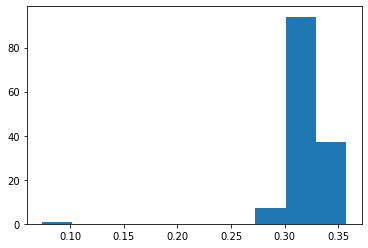

In [103]:
# Generate and display a histogram of the values in memory_footprints using pyplot.hist()

# graf kaže velikosti chunkov (x) in njihovo število (y)
import matplotlib.pyplot as plt

plt.hist(memory_footprints)
plt.show()

### Counting Across Chunks

In [115]:
# Create an iterator object that reads in 250-row chunks from "moma.csv".
chunk_iter = pd.read_csv("data/MoMAExhibitions1929to1989.csv", chunksize=250)

In [116]:
# For each chunk, retrieve the number of rows and add it to num_rows.
num_rows = 0

for chunk in chunk_iter:
    num_rows = num_rows + chunk.shape[0]
    


In [117]:
num_rows

34558

### Batch Processing

<img src="./images/process_chunks_count.png">

In [118]:
# python liste so precej počasne, zato uporabljamo seriese listov in jih na koncu združimo (concat)

series_list = [pd.Series([1,2]), pd.Series([2,3])]

pd.concat(series_list)

0    1
1    2
0    2
1    3
dtype: int64

In [119]:
lifespans = []

In [120]:
dtypes = { 'ConstituentBeginDate': 'float',
          'ConstituentEndDate': 'float'}

chunk_iter = pd.read_csv("data/MoMAExhibitions1929to1989.csv", 
                         chunksize=250,
                        dtype=dtypes)

In [121]:
for chunk in chunk_iter:
    diff = chunk['ConstituentEndDate'] - chunk['ConstituentBeginDate']
    lifespans.append(diff)


In [124]:
# to je list poln seriesov. Moramo jih združiti skupaj
lifespans

[0      79.0
 1      67.0
 2      55.0
 3      37.0
 4      32.0
 5      74.0
 6      52.0
 7      41.0
 8      85.0
 9      65.0
 10     85.0
 11     66.0
 12     89.0
 13     72.0
 14     64.0
 15     66.0
 16     83.0
 17     76.0
 18     99.0
 19     45.0
 20     80.0
 21     79.0
 22     80.0
 23     80.0
 24     80.0
 25     81.0
 26     98.0
 27     90.0
 28     56.0
 29     74.0
        ... 
 220    56.0
 221    89.0
 222    74.0
 223    89.0
 224    55.0
 225    92.0
 226    49.0
 227    77.0
 228    67.0
 229     NaN
 230    66.0
 231    83.0
 232    74.0
 233     NaN
 234    55.0
 235    90.0
 236    72.0
 237     NaN
 238    85.0
 239    36.0
 240    86.0
 241    92.0
 242    73.0
 243    85.0
 244    65.0
 245    76.0
 246    85.0
 247    78.0
 248    66.0
 249    90.0
 Length: 250, dtype: float64, 250    32.0
 251    72.0
 252    37.0
 253    79.0
 254    85.0
 255    71.0
 256    99.0
 257    78.0
 258     NaN
 259    87.0
 260    80.0
 261    32.0
 262    86.0
 263    6

In [125]:
lifespans_dist = pd.concat(lifespans)

In [126]:
lifespans_dist.head()

0    79.0
1    67.0
2    55.0
3    37.0
4    32.0
dtype: float64

### Optimizing Performance

In [133]:
# pametno je, da preberemo samo tiste stolppce, ki jih potrebujemo
# pametno je imeti čim večji chunk size (kolikor gre), ker je drugače preveč overheada

In [131]:
%%timeit
lifespans = []

chunk_iter = pd.read_csv("data/MoMAExhibitions1929to1989.csv", chunksize=250, 
                         dtype={"ConstituentBeginDate": "float", "ConstituentEndDate": "float"})

for chunk in chunk_iter:
    lifespans.append(chunk['ConstituentEndDate'] - chunk['ConstituentBeginDate'])


1.47 s ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [132]:
%%timeit
lifespans = []

chunk_iter = pd.read_csv("data/MoMAExhibitions1929to1989.csv", chunksize=250, 
                         dtype={"ConstituentBeginDate": "float", "ConstituentEndDate": "float"},  
                         usecols=['ConstituentBeginDate', 'ConstituentEndDate'])

for chunk in chunk_iter:
    lifespans.append(chunk['ConstituentEndDate'] - chunk['ConstituentBeginDate'])
    
lifespans_dist = pd.concat(lifespans)

502 ms ± 3.96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Counting Unique Values

<img src="./images/processing_chunks_value_counts.png">

We can use the pandas.concat() function to combine all of the chunks at the end.

In [134]:
chunk_iter = pd.read_csv("data/MoMAExhibitions1929to1989.csv",
                         chunksize=250, usecols=['Gender'])

In [141]:
overall_vc = []

for chunk in chunk_iter:
    chunk_vc = chunk['Gender'].value_counts()
    overall_vc.append(chunk_vc)

In [142]:
combined_vc = pd.concat(overall_vc)

In [143]:
combined_vc.head()

Male      208
Female      9
Male      193
Female      6
Male      195
Name: Gender, dtype: int64

In [139]:
# to moramo še združiti z GroupBy, da sešteje vse Male in vse Female

### Combining Chunks Using GroupBy

In [144]:
combined_vc = combined_vc.groupby(combined_vc.index).sum()

In [145]:
combined_vc

Female     2527
Male      23268
male          1
Name: Gender, dtype: int64

## Analizing big files with Pandas and SQLite

In [159]:
import sqlite3

In [160]:
conn = sqlite3.connect('data/moma.db')

In [161]:
moma_iter = pd.read_csv('data/moma.csv', chunksize=1000)

In [162]:
for chunk in moma_iter:
    chunk.to_sql('exhibitions', conn, 
                 if_exists='append', index=False)

In [163]:
# vaja: isto, za ExhibitionTitle (slučajno je znotraj tega poglavja)

In [147]:
chunk_iter = pd.read_csv("data/MoMAExhibitions1929to1989.csv",
                         chunksize=250, usecols=['ExhibitionTitle'])

In [148]:
overall_vc = []

for chunk in chunk_iter:
    chunk_vc = chunk['ExhibitionTitle'].value_counts()
    overall_vc.append(chunk_vc)

In [149]:
combined_vc = pd.concat(overall_vc)

In [150]:
combined_vc = combined_vc.groupby(combined_vc.index).sum()

In [158]:
combined_vc.sort_values(ascending = False).head(10)

Good Design                                                                                       768
Recent Acquisitions                                                                               766
Painting and Sculpture from the Museum Collection                                                 440
Transformations in Modern Architecture                                                            321
The 28th Annual Exhibition of Advertising and Editorial Art of the New York Art Directors Club    302
Painting, Sculpture, Prints                                                                       288
New Horizons in American Art                                                                      284
Photographs from the Museum Collection                                                            276
XXVth Anniversary Exhibition: Paintings from the Museum Collection                                262
20th Century Design from the Museum Collection                                    

In [164]:
# dva osnovna principa: vse računamo v SQLlite ali vse v pandasu
# Vse v SQL: ne rabi RAMa in lahko delamo večje izračune
# vse v Pandas: omejeni smo s pomnilnikom, zato delamo po koščkih. Je pa precej hitreje kot v SQLlite

### Computing Primarily in SQL

In [165]:
conn = sqlite3.connect('data/moma.db')

In [166]:
q = '''SELECT exhibitionid, count(*) AS counts 
    from exhibitions 
    GROUP BY exhibitionid 
    ORDER BY counts desc;'''

In [167]:
eid_counts = pd.read_sql_query(q, conn)

In [168]:
conn.close()

In [169]:
eid_counts.head(10)

,ExhibitionID,counts
0,NaN,858
1,7.0,642
2,3838.0,604
3,3030.0,568
4,3988.0,550
5,2600.0,524
6,79.0,518
7,10601.0,512
8,3939.0,508
9,3036.0,488


### Computing Primarily in Pandas

In [178]:
conn = sqlite3.connect('data/moma.db')

In [179]:
q = 'SELECT exhibitionid from exhibitions;'

In [180]:
eid_counts = pd.read_sql_query(q, conn)

In [181]:
conn.close()

In [182]:
eid_counts.head()

,ExhibitionID
0,2557.0
1,2557.0
2,2557.0
3,2557.0
4,2557.0


In [185]:
eid_pandas_counts = eid_counts['ExhibitionID'].value_counts(dropna = False)

In [186]:
eid_pandas_counts.head(10)

NaN        858
7.0        642
3838.0     604
3030.0     568
3988.0     550
2600.0     524
79.0       518
10601.0    512
3939.0     508
3036.0     488
Name: ExhibitionID, dtype: int64

### Reading in SQL Results Using Chunks

In [187]:
# primerjava hitrosti glede na chunk size
conn = sqlite3.connect('data/moma.db')

In [188]:
%%timeit
q = 'select exhibitionid from exhibitions;'
chunk_iter = pd.read_sql(q, conn, chunksize=100)

for chunk in chunk_iter:
    eid_pandas_counts = eid_counts['ExhibitionID'].value_counts()

2.3 s ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [189]:
%%timeit
q = 'select exhibitionid from exhibitions;'
chunk_iter = pd.read_sql(q, conn, chunksize=1000)

for chunk in chunk_iter:
    eid_pandas_counts = eid_counts['ExhibitionID'].value_counts()

353 ms ± 4.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [190]:
%%timeit
q = 'select exhibitionid from exhibitions;'
chunk_iter = pd.read_sql(q, conn, chunksize=10000)

for chunk in chunk_iter:
    eid_pandas_counts = eid_counts['ExhibitionID'].value_counts()

149 ms ± 3.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Vaja: Primer analize velikega dataseta

In [212]:
# recimo, da imamo 10 MB pomnilnika, zato bomo brali po 5000 vrstic
chunk_iter = pd.read_csv('data/crunchbase-investments.csv', 
                         chunksize=5000, 
                        encoding='ISO-8859-1')

In [201]:
chunk_iter.isnull

AttributeError: 'TextFileReader' object has no attribute 'isnull'

In [193]:
mv_list = []

for chunk in chunk_iter:
    print(chunk.memory_usage(deep = True).sum()/1024/1024)



5.579195022583008
5.528186798095703
5.535004615783691
5.528162956237793
5.5243072509765625
5.553412437438965
5.531391143798828
5.509613037109375
5.396090507507324
4.63945198059082
2.663668632507324


In [194]:
# koliko je manjkajočih vrednosti v vsakem stolpcu?

In [213]:
overall_nan = []

for chunk in chunk_iter:
    chunk_nan = chunk.isnull().sum()
    overall_nan.append(chunk_nan)

In [214]:
combined_nan = pd.concat(overall_nan)

In [215]:
combined_nan.head()

company_permalink         0
company_name              0
company_category_code    52
company_country_code      0
company_state_code       53
dtype: int64

In [219]:
combined_nan_grouped = combined_nan.groupby(combined_nan.index).sum()

In [220]:
combined_nan_grouped.sort_values()

company_country_code          1
company_name                  1
company_permalink             1
company_region                1
investor_region               2
investor_permalink            2
investor_name                 2
funded_quarter                3
funded_at                     3
funded_month                  3
funded_year                   3
funding_round_type            3
company_state_code          492
company_city                533
company_category_code       643
raised_amount_usd          3599
investor_country_code     12001
investor_city             12480
investor_state_code       16809
investor_category_code    50427
dtype: int64

In [221]:
# koliko pomnnilnika porabi vsak stolpec posebej?

In [228]:
chunk_iter = pd.read_csv('data/crunchbase-investments.csv', 
                         chunksize=5000, 
                        encoding='ISO-8859-1')

In [229]:
memory_fp = []
counter = 0
series_memory_fp = pd.Series()

for chunk in chunk_iter:
    if counter == 0:
        series_memory_fp = chunk.memory_usage(deep = True)
    else:
        series_memory_fp += chunk.memory_usage(deep = True)
    counter += 1
        

In [231]:
series_memory_fp/1024/1024

Index                     0.000877
company_permalink         3.869808
company_name              3.424955
company_category_code     3.262619
company_country_code      3.025223
company_state_code        2.962161
company_region            3.253541
company_city              3.343512
investor_permalink        4.749821
investor_name             3.734270
investor_category_code    0.593590
investor_country_code     2.524654
investor_state_code       2.361876
investor_region           3.238946
investor_city             2.751430
funding_round_type        3.252704
funded_at                 3.378091
funded_month              3.226837
funded_quarter            3.226837
funded_year               0.403366
raised_amount_usd         0.403366
dtype: float64

In [232]:
# radi bi identificirali podatkovni tip vsakega stolpca

In [233]:
# Key: Column name, Value: List of types
col_types = {}
chunk_iter = pd.read_csv('data/crunchbase-investments.csv', 
                         chunksize=5000, 
                         encoding='ISO-8859-1')

for chunk in chunk_iter:
    for col in chunk.columns:
        if col not in col_types:
            col_types[col] = [str(chunk.dtypes[col])]
        else:
            col_types[col].append(str(chunk.dtypes[col]))

    

In [235]:
# ni vsak stolpec v vsakem chunku istega tipa
col_types

{'company_permalink': ['object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object'],
 'company_name': ['object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object'],
 'company_category_code': ['object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object'],
 'company_country_code': ['object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object'],
 'company_state_code': ['object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object'],
 'company_region': ['object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object',
  'object'],
 'company_city': ['object',
  'object',
  'object',
  'object',
  'object',


In [237]:
unique_col_types = {}

for k,v in col_types.items():
    unique_col_types[k] = set(col_types[k])   # v setu se vrednosti ne morejo ponavljati, tako da ostanejo samo unique
    
# nekateri stolpci bodo imeli več tipov, npr. zaradi NaN-ov v nekaterih chunkih
unique_col_types

{'company_permalink': {'object'},
 'company_name': {'object'},
 'company_category_code': {'object'},
 'company_country_code': {'object'},
 'company_state_code': {'object'},
 'company_region': {'object'},
 'company_city': {'object'},
 'investor_permalink': {'object'},
 'investor_name': {'object'},
 'investor_category_code': {'float64', 'object'},
 'investor_country_code': {'float64', 'object'},
 'investor_state_code': {'float64', 'object'},
 'investor_region': {'object'},
 'investor_city': {'float64', 'object'},
 'funding_round_type': {'object'},
 'funded_at': {'object'},
 'funded_month': {'object'},
 'funded_quarter': {'object'},
 'funded_year': {'float64', 'int64'},
 'raised_amount_usd': {'float64'}}

In [239]:
# zapišemo v SQL bazo

In [249]:
import sqlite3
conn = sqlite3.connect('data/crunchbase.db')
chunk_iter = pd.read_csv('data/crunchbase-investments.csv', 
                         chunksize=5000, 
                         encoding='ISO-8859-1')

for chunk in chunk_iter:
    chunk.to_sql('investments', conn,
                 if_exists = 'append', index = False)


In [250]:
q = 'SELECT * FROM investments LIMIT 5;'
data_5 = pd.read_sql_query(q, conn)

In [251]:
data_5

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,None,USA,NY,New York,New York,series-a,2012-10-30,2012-10,2012-Q4,2012,2000000.0
1,/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-23,2012-01,2012-Q1,2012,20000.0
2,/company/utap,uTaP,messaging,USA,None,United States - Other,None,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-01,2012-01,2012-Q1,2012,20000.0
3,/company/zoopshop,ZoopShop,software,USA,OH,Columbus,columbus,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2012-02-15,2012-02,2012-Q1,2012,20000.0
4,/company/efuneral,eFuneral,web,USA,OH,Cleveland,Cleveland,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2011-09-08,2011-09,2011-Q3,2011,20000.0


In [252]:
# katera vrsta podjetij je pritegnila največ investicij (število podjetij)?

Which category of company attracted the most investments?

In [253]:
q = '''SELECT company_category_code, count(*) AS counts 
    from investments 
    GROUP BY company_category_code 
    ORDER BY counts desc;'''

In [254]:
data = pd.read_sql_query(q, conn)

In [256]:
data.head(10)

,company_category_code,counts
0,software,14486
1,web,10030
2,biotech,9902
3,enterprise,8978
4,mobile,8134
5,advertising,6400
6,ecommerce,4336
7,cleantech,3896
8,games_video,3786
9,analytics,3726


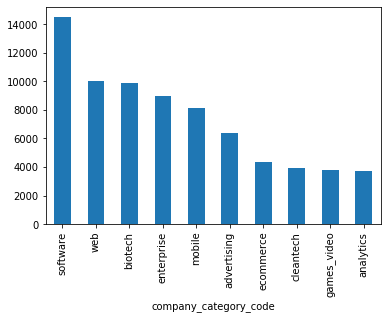

In [258]:
data.head(10).plot(kind = 'bar', x = 'company_category_code', y = 'counts', legend = False)
plt.show()

## More file formats

- [Big Data file formats](https://luminousmen.com/post/big-data-file-formats)

### [Parquet](https://parquet.apache.org/)

Launched in 2013, Parquet was developed by Cloudera and Twitter to serve as a column-based storage format, optimized for work with multi-column datasets. Because data is stored by columns, it can be highly compressed (compression algorithms perform better on data with low information entropy which is usually contained in columns) and splittable. The developers of the format claim that this storage format is ideal for Big Data problems.

### [Avro](https://avro.apache.org/)

Apache Avro was released by the Hadoop working group in 2009. It is a row-based format that is highly splittable. It also described as a data serialization system similar to Java Serialization. The schema is stored in JSON format while the data is stored in binary format, minimizing file size and maximizing efficiency. Avro has robust support for schema evolution by managing added fields, missing fields, and fields that have changed. This allows old software to read the new data and new software to read the old data — a critical feature if your data has the potential to change.

### [Feather](https://github.com/wesm/feather)

Feather provides binary columnar serialization for data frames. It is designed to make reading and writing data frames efficient, and to make sharing data across data analysis languages easy. Feather uses the Apache Arrow columnar memory specification to represent binary data on disk. This makes read and write operations very fast. This is particularly important for encoding null/NA values and variable-length types like UTF8 strings.

Feather is a part of the broader Apache Arrow project. Feather defines its own simplified schemas and metadata for on-disk representation.

### [HDF5](https://portal.hdfgroup.org/display/knowledge/What+is+HDF5)

HDF5 is a unique technology suite that makes possible the management of extremely large and complex data collections.

The HDF5 technology suite is designed to organize, store, discover, access, analyze, share, and preserve diverse, complex data in continuously evolving heterogeneous computing and storage environments.

HDF5 supports all types of data stored digitally, regardless of origin or size. Petabytes of remote sensing data collected by satellites, terabytes of computational results from nuclear testing models, and megabytes of high-resolution MRI brain scans are stored in HDF5 files, together with metadata necessary for efficient data sharing, processing, visualization, and archiving.

## Druga zanimiva orodja

### Dask

- [Dokumentacija](https://docs.dask.org/en/latest/)
- [How to handle large datasets in Python with Pandas and Dask](https://towardsdatascience.com/how-to-handle-large-datasets-in-python-with-pandas-and-dask-34f43a897d55)

<p><em>Dask is a flexible library for parallel computing in Python.</em></p>
<p>Dask is composed of two parts:</p>
    <ol class="arabic simple">
<li><strong>Dynamic task scheduling</strong> optimized for computation. This is similar to
<em>Airflow, Luigi, Celery, or Make</em>, but optimized for interactive
computational workloads.</li>
<li><strong>“Big Data” collections</strong> like parallel arrays, dataframes, and lists that
extend common interfaces like <em>NumPy, Pandas, or Python iterators</em> to
larger-than-memory or distributed environments. These parallel collections
run on top of dynamic task schedulers.</li>
</ol>